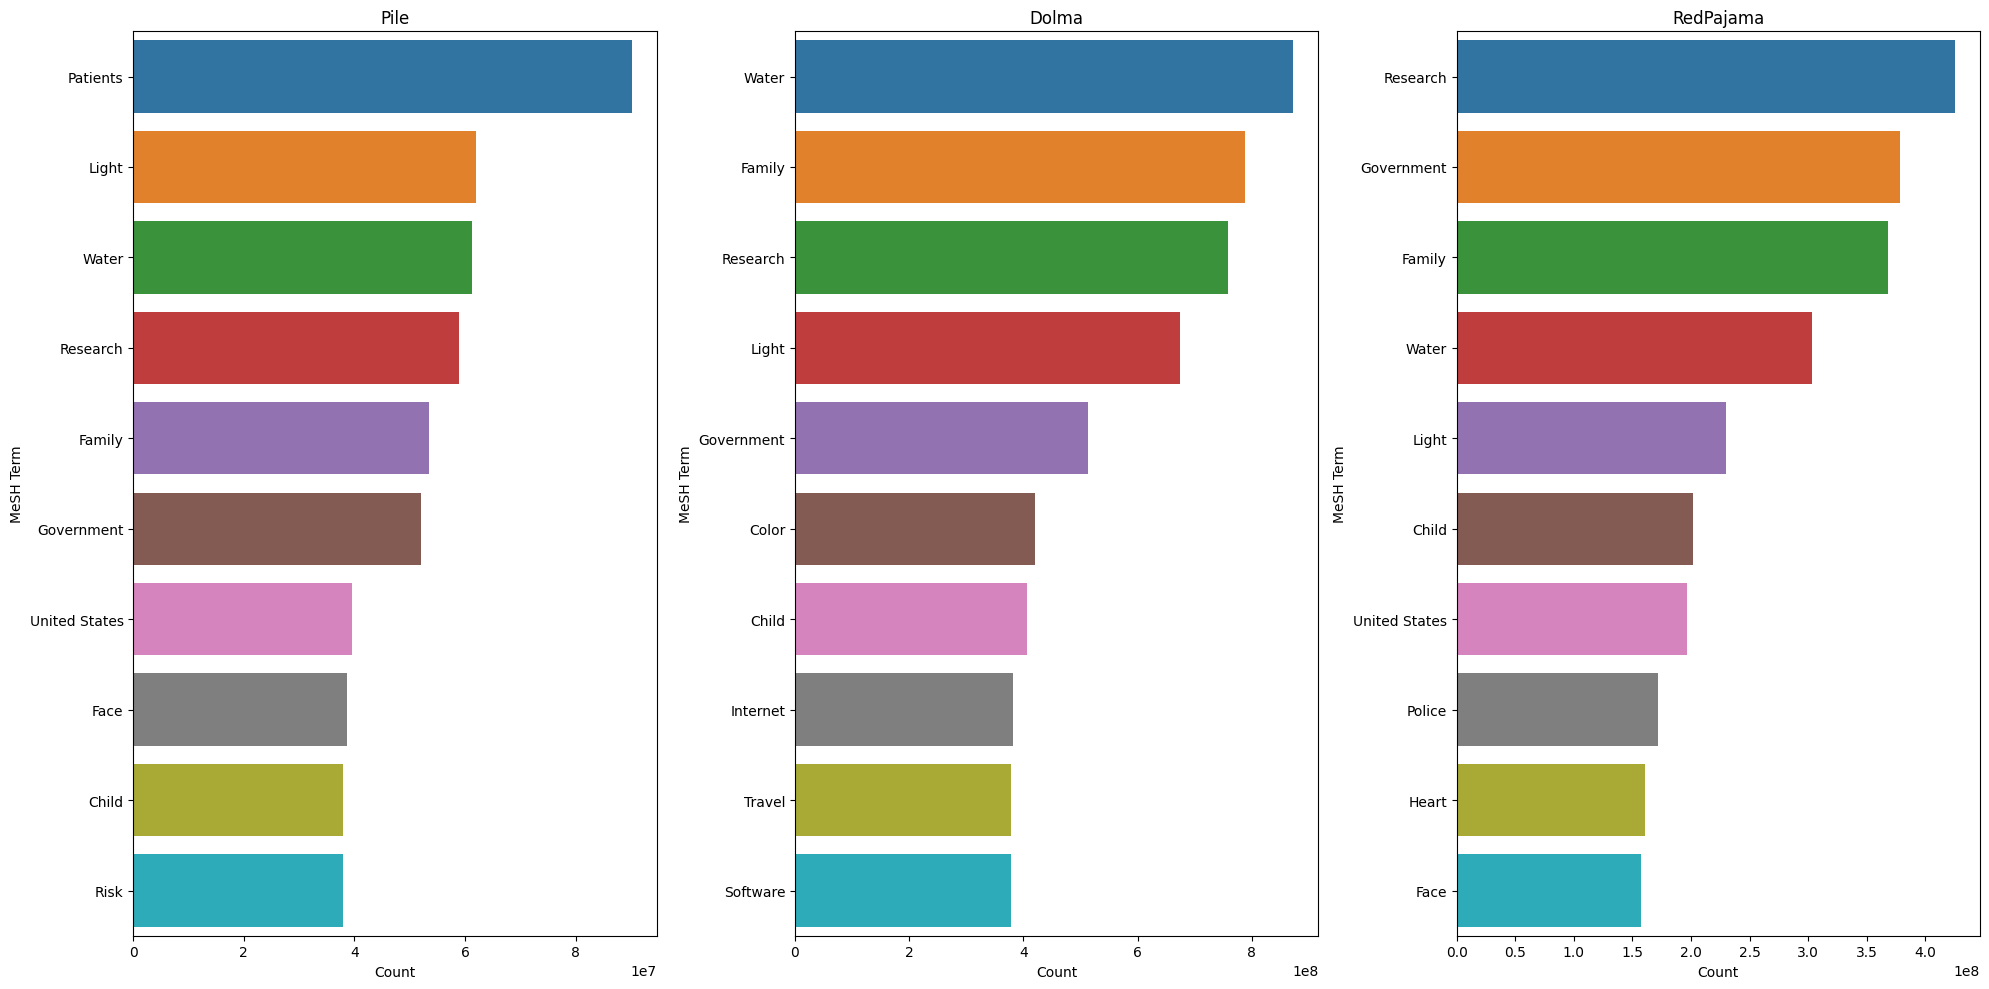

In [7]:



#Visualize top 10 most frequent mesh terms in each dataset in a grid plot

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

sns.barplot(x='Count', y='Term', data=meshcounts_pile.head(10), ax=axes[0])
axes[0].set_title('Pile')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('MeSH Term')

sns.barplot(x='Count', y='Term', data=meshcounts_dolma.head(10), ax=axes[1])
axes[1].set_title('Dolma')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('MeSH Term')

sns.barplot(x='Count', y='Term', data=meshcounts_rpj.head(10), ax=axes[2])
axes[2].set_title('RedPajama')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('MeSH Term')

plt.tight_layout()
plt.show()







PubMedQA is interesting because it features a query that can be answered using the context of the question, i.e. the pubmed abstract or summary. This is easier than the other tasks, and we see this performance follows the scaling laws well. 

Now everyone is using RAG, and this tasks essentially tests how well models trained on broad open-source corpora perform on qa for the biomedical domain, given the relevant information in-context. 

So now we want to:

1) Merge counted mesh terms into one df and normalize by term count for every million token in training corpus

2) start building a dataframe for analysis

idea for ideal df:

Question ID | Question text | Model name | Model Acc on question | Mesh Terms related to question | Biomedical Entities in question | Biomedical Entity types in question | Avg Mesh Term Count | Avg Normalized Mesh Term Count | Avg 


Figure out: 
The best way to assess and show corpus similarities from mesh term counts, biomedical entity counts and biomedical entity type distributions. 


Can MeSH terms be automatically grouped or sorted in relevant ways using some kind of online taxonomy? 

In [12]:
import pandas as pd

pile_df = pd.read_csv('mesh_infinigram_counts_pile.csv')
dolma_df = pd.read_csv('mesh_infinigram_counts_dolma.csv')
rpj_df = pd.read_csv('mesh_infinigram_counts_rpj.csv')


# Total token counts for each corpus
total_tokens = {
    'dolma': 3067858892487,
    'pile': 383299322520,
    'rpj': 1385942948192
}

# Normalize counts by total token count (per million tokens)
dolma_df['Normalized Count'] = (dolma_df['Count'] / total_tokens['dolma']) * 1e6
pile_df['Normalized Count'] = (pile_df['Count'] / total_tokens['pile']) * 1e6
rpj_df['Normalized Count'] = (rpj_df['Count'] / total_tokens['rpj']) * 1e6

# Rename columns to reflect the corpus
dolma_df.rename(columns={'Normalized Count': 'Dolma'}, inplace=True)
pile_df.rename(columns={'Normalized Count': 'Pile'}, inplace=True)
rpj_df.rename(columns={'Normalized Count': 'RPJ'}, inplace=True)

# Merge the data frames on the 'Term' column
merged_df = dolma_df[['Term', 'Dolma']].merge(
    pile_df[['Term', 'Pile']], on='Term', how='outer').merge(
    rpj_df[['Term', 'RPJ']], on='Term', how='outer')


# Display the first few rows of the merged dataframe
merged_df.head()

merged_df.to_csv('mesh_infinigram_counts_merged_normalized.csv', index=False)


#Find a way to analyze the differences and similarities in the corpora based on mesh term occurrence



#First can we predict PubMedQA performance from distribution of term counts

#Second can we predict avg model performance across tasks based on the distribution of term counts


In [13]:

#make non normalized merge too

pile_df = pd.read_csv('mesh_infinigram_counts_pile.csv')
dolma_df = pd.read_csv('mesh_infinigram_counts_dolma.csv')
rpj_df = pd.read_csv('mesh_infinigram_counts_rpj.csv')

dolma_df.rename(columns={'Count': 'Dolma'}, inplace=True)
pile_df.rename(columns={'Count': 'Pile'}, inplace=True)
rpj_df.rename(columns={'Count': 'RPJ'}, inplace=True)

merged_df_nn = dolma_df[['Term', 'Dolma']].merge(
    pile_df[['Term', 'Pile']], on='Term', how='outer').merge(
    rpj_df[['Term', 'RPJ']], on='Term', how='outer')

merged_df_nn.to_csv('mesh_infinigram_counts_merged.csv', index=False)

In [1]:
#Do the same for ner counts (both for question counts and context counts replacing df names accordingly)
import pandas as pd

pile_df_ner_context = pd.read_csv('biomed_ner_context_infinigram_counts_pile.csv')
dolma_df_ner_context = pd.read_csv('biomed_ner_context_infinigram_counts_dolma.csv')
rpj_df_ner_context = pd.read_csv('biomed_ner_context_infinigram_counts_rpj.csv')


# Total token counts for each corpus
total_tokens = {
    'dolma': 3067858892487,
    'pile': 383299322520,
    'rpj': 1385942948192
}

# Normalize counts by total token count (per million tokens)
dolma_df_ner_context['Normalized Count'] = (dolma_df_ner_context['Count'] / total_tokens['dolma']) * 1e6
pile_df_ner_context['Normalized Count'] = (pile_df_ner_context['Count'] / total_tokens['pile']) * 1e6
rpj_df_ner_context['Normalized Count'] = (rpj_df_ner_context['Count'] / total_tokens['rpj']) * 1e6

# Rename columns to reflect the corpus
dolma_df_ner_context.rename(columns={'Normalized Count': 'Dolma'}, inplace=True)
pile_df_ner_context.rename(columns={'Normalized Count': 'Pile'}, inplace=True)
rpj_df_ner_context.rename(columns={'Normalized Count': 'RPJ'}, inplace=True)

# Merge the data frames on the 'Term' column
merged_df_ner_context = dolma_df_ner_context[['Term', 'Dolma']].merge(
    pile_df_ner_context[['Term', 'Pile']], on='Term', how='outer').merge(
    rpj_df_ner_context[['Term', 'RPJ']], on='Term', how='outer')


# Display the first few rows of the merged dataframe
merged_df_ner_context.head()

merged_df_ner_context.to_csv('biomedical_ner_context_infinigram_counts_merged_normalized.csv', index=False)



In [2]:

#make non normalized merge too

pile_df_ner_context = pd.read_csv('biomed_ner_context_infinigram_counts_pile.csv')
dolma_df_ner_context = pd.read_csv('biomed_ner_context_infinigram_counts_dolma.csv')
rpj_df_ner_context = pd.read_csv('biomed_ner_context_infinigram_counts_rpj.csv')


dolma_df_ner_context.rename(columns={'Count': 'Dolma'}, inplace=True)
pile_df_ner_context.rename(columns={'Count': 'Pile'}, inplace=True)
rpj_df_ner_context.rename(columns={'Count': 'RPJ'}, inplace=True)

merged_df_nn_ner_context = dolma_df_ner_context[['Term', 'Dolma']].merge(
    pile_df_ner_context[['Term', 'Pile']], on='Term', how='outer').merge(
    rpj_df_ner_context[['Term', 'RPJ']], on='Term', how='outer')

merged_df_nn_ner_context.to_csv('biomedical_ner_context_infinigram_counts_merged.csv', index=False)

In [4]:
import json

def get_pubmed_results(file_path):
    """
    Function to read in the jsonl file of model results and return a pandas dataframe with the results
    along with the metadata for each question

    """
    

    # Read the entire file content
    with open(file_path, 'r') as file:
        file_content = file.read().strip()  # Read and strip unnecessary whitespace

    # Attempt to parse the entire content assuming it's a properly formatted JSON array

    data = json.loads(file_content)



    data_list = []
    for document in data:
        doc_id = document['doc_id']
        question = document['doc'].get('QUESTION', "")
        context = document['doc'].get("CONTEXTS", "")
        year = document['doc'].get('YEAR', "")
        labels = ", ".join(document['doc'].get('LABELS', []))
        meshes = ", ".join(document['doc'].get('MESHES', []))
        reasoning_required = document['doc'].get('reasoning_required_pred', "")
        reasoning_free = document['doc'].get('reasoning_free_pred', "")
        final_decision = document['doc'].get('final_decision', "")
        target = document['target']
        acc = document['acc']

        # Extract responses and determine the model's predicted answer based on the highest score
        responses = document['resps']
        # Assuming answers are in the order ['yes', 'no', 'maybe'] for the scores in `resps`
        response_labels = ['yes', 'no', 'maybe']
        highest_score_index = max(range(len(responses)), key=lambda i: responses[i][0][0])
        predicted_answer = response_labels[highest_score_index]

        # Check if the model's prediction matches the final decision
        model_correct = (predicted_answer == final_decision)

        data_list.append({
            "Doc ID": doc_id,
            "Question": question,
            "Context": context,
            "Year": year,
            "Labels": labels,
            "MESH Terms": meshes,
            "Reasoning Required": reasoning_required,
            "Reasoning Free": reasoning_free,
            "Final Decision": final_decision,
            "Target": target,
            "Model Accuracy (Reported)": acc,
            "Model Predicted Answer": predicted_answer,
            "Model Correct": model_correct
        })

    df = pd.DataFrame(data_list)  
    return df  

#there is definitely a faster way to do this on a folder level but oh well
#OLMo
olmo7b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_allenai/pretrained=allenai__OLMo-7B,trust_remote_code=True_pubmedqa.jsonl')
olmo1b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_allenai/pretrained=allenai__OLMo-1B,trust_remote_code=True_pubmedqa.jsonl')
#Pythia
pythia70m_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-70m-deduped_pubmedqa.jsonl')
pythia160m_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-160m-deduped_pubmedqa.jsonl')
pythia410m_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-410m-deduped_pubmedqa.jsonl')
pythia1b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-1b-deduped_pubmedqa.jsonl')
pythia2_8b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-2.8b-deduped_pubmedqa.jsonl')
pythia6_9b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-6.9b-deduped_pubmedqa.jsonl')
pythia12b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_pythia/pretrained=EleutherAI__pythia-12b-deduped_pubmedqa.jsonl')
#Mamba
mamba130m_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_mamba/pretrained=state-spaces__mamba-130m,trust_remote_code=True_pubmedqa.jsonl')
mamba370m_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_mamba/pretrained=state-spaces__mamba-370m,trust_remote_code=True_pubmedqa.jsonl')
mamba790m_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_mamba/pretrained=state-spaces__mamba-790m,trust_remote_code=True_pubmedqa.jsonl')
mamba1_4b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_mamba/pretrained=state-spaces__mamba-1.4b,trust_remote_code=True_pubmedqa.jsonl')
mamba2_8b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_mamba/pretrained=state-spaces__mamba-2.8b,trust_remote_code=True_pubmedqa.jsonl')
#LLM360 and OpenLlama
llm360_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_llm360/pretrained=LLM360__Amber,trust_remote_code=True_pubmedqa.jsonl')
openllama3b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_openllama/pretrained=openlm-research__open_llama_3b,trust_remote_code=True_pubmedqa.jsonl')
openllama7b_pubmed = get_pubmed_results('../results/raw_outputs/logged-samples/outputs_openllama/pretrained=openlm-research__open_llama_7b,trust_remote_code=True_pubmedqa.jsonl')

#Again this is not that elegant but...

# Add a 'Model Family' column to each dataframe

olmo7b_pubmed['Model Family'] = 'OLMo'
olmo1b_pubmed['Model Family'] = 'OLMo'
pythia70m_pubmed['Model Family'] = 'Pythia'
pythia160m_pubmed['Model Family'] = 'Pythia'
pythia410m_pubmed['Model Family'] = 'Pythia'
pythia1b_pubmed['Model Family'] = 'Pythia'
pythia2_8b_pubmed['Model Family'] = 'Pythia'
pythia6_9b_pubmed['Model Family'] = 'Pythia'
pythia12b_pubmed['Model Family'] = 'Pythia'
mamba130m_pubmed['Model Family'] = 'Mamba'
mamba370m_pubmed['Model Family'] = 'Mamba'
mamba790m_pubmed['Model Family'] = 'Mamba'
mamba1_4b_pubmed['Model Family'] = 'Mamba'
mamba2_8b_pubmed['Model Family'] = 'Mamba'
llm360_pubmed['Model Family'] = 'LLM360'
openllama3b_pubmed['Model Family'] = 'OpenLlama'
openllama7b_pubmed['Model Family'] = 'OpenLlama'

# Add a 'Param' column to each dataframe
olmo7b_pubmed['Param'] = '7B'
olmo1b_pubmed['Param'] = '1B'
pythia70m_pubmed['Param'] = '70M'
pythia160m_pubmed['Param'] = '160M'
pythia410m_pubmed['Param'] = '410M'
pythia1b_pubmed['Param'] = '1B'
pythia2_8b_pubmed['Param'] = '2.8B'
pythia6_9b_pubmed['Param'] = '6.9B'
pythia12b_pubmed['Param'] = '12B'
mamba130m_pubmed['Param'] = '130M'
mamba370m_pubmed['Param'] = '370M'
mamba790m_pubmed['Param'] = '790M'
mamba1_4b_pubmed['Param'] = '1.4B'
mamba2_8b_pubmed['Param'] = '2.8B'
llm360_pubmed['Param'] = '7B'
openllama3b_pubmed['Param'] = '3B'
openllama7b_pubmed['Param'] = '7B'


# Add a training data column to each dataframe
olmo7b_pubmed['Training Data'] = 'Dolma'
olmo1b_pubmed['Training Data'] = 'Dolma'
pythia70m_pubmed['Training Data'] = 'Pile'
pythia160m_pubmed['Training Data'] = 'Pile'
pythia410m_pubmed['Training Data'] = 'Pile'
pythia1b_pubmed['Training Data'] = 'Pile'
pythia2_8b_pubmed['Training Data'] = 'Pile'
pythia6_9b_pubmed['Training Data'] = 'Pile'
pythia12b_pubmed['Training Data'] = 'Pile'
mamba130m_pubmed['Training Data'] = 'Pile'
mamba370m_pubmed['Training Data'] = 'Pile'
mamba790m_pubmed['Training Data'] = 'Pile'
mamba1_4b_pubmed['Training Data'] = 'Pile'
mamba2_8b_pubmed['Training Data'] = 'Pile'
llm360_pubmed['Training Data'] = 'RPJ'
openllama3b_pubmed['Training Data'] = 'RPJ'
openllama7b_pubmed['Training Data'] = 'RPJ'


# Concatenate all dataframes
all_data_pubmed = pd.concat([
    olmo7b_pubmed, olmo1b_pubmed, pythia70m_pubmed, pythia160m_pubmed, pythia410m_pubmed, pythia1b_pubmed, 
    pythia2_8b_pubmed, pythia6_9b_pubmed, pythia12b_pubmed, mamba130m_pubmed, mamba370m_pubmed, mamba790m_pubmed, 
    mamba1_4b_pubmed, mamba2_8b_pubmed, llm360_pubmed, openllama3b_pubmed, openllama7b_pubmed
], ignore_index=True)



In [5]:

all_data_pubmed.to_csv('all_data_pubmed.csv', index=False)

In [8]:
#Add columns for biomedical entities found in question and found in question context
import pandas as pd
all_data_pubmed = pd.read_csv('all_data_pubmed.csv')

all_tags = pd.read_csv('pubmedqa_all_ner_counts.csv')



# Select the last four columns and the DOC ID column from all_tags
selected_columns = all_tags.columns[-4:].tolist()
selected_columns.append('Doc ID')
all_tags_selected = all_tags[selected_columns]

# Merge the selected columns with all_data_pubmed on the DOC ID column
merged_data = pd.merge(all_data_pubmed, all_tags_selected, on='Doc ID', how='left')
#add columnn for normalized mesh term counts

In [9]:
merged_data.to_csv('all_data_pubmed_w_entities.csv')

In [16]:
mesh_counts = pd.read_csv('mesh_infinigram_counts_merged.csv')
entity_question_counts = pd.read_csv('biomedical_ner_infinigram_counts_merged.csv')
entity_context_counts = pd.read_csv('biomedical_ner_context_infinigram_counts_merged.csv')

mesh_counts_normalized = pd.read_csv('mesh_infinigram_counts_merged_normalized.csv')
entity_question_counts_normalized = pd.read_csv('biomedical_ner_infinigram_counts_merged_normalized.csv')
entity_context_counts_normalized = pd.read_csv('biomedical_ner_context_infinigram_counts_merged_normalized.csv')

#ADD RAW MESH COUNTS FIRST --------------------------------------------

# Strip and split the MESH terms column to make it a list of terms for easier processing
merged_data['MESH Terms List'] = merged_data['MESH Terms'].str.split(', ')

# Create a dictionary of MESH term counts for quick lookup
mesh_counts_dict = mesh_counts.set_index('Term').to_dict(orient='index')

# Function to create a dictionary of MESH terms with their counts for each row
def get_mesh_counts(mesh_terms, counts_dict):
    return {term: counts_dict.get(term, {'Dolma': 0, 'Pile': 0, 'RPJ': 0}) for term in mesh_terms}

# Apply the function to the main data
merged_data['MESH Term Counts'] = merged_data['MESH Terms List'].apply(lambda x: get_mesh_counts(x, mesh_counts_dict))

#ADD RAW ENTITY COUNTS ------------------------------------------------------

#FIRST QUESTION COUNTS
import ast  # To convert string representation of list to actual list

# Convert string lists to actual lists
merged_data['Biomedical Entities List'] = merged_data['Biomedical Entities'].apply(ast.literal_eval)

# Create a dictionary of entity counts for questions for quick lookup
entity_question_counts_dict = entity_question_counts.set_index('Term').to_dict(orient='index')

# Function to create a dictionary of entity counts for each row
def get_entity_counts(entities, counts_dict):
    return {entity: counts_dict.get(entity, {'Dolma': 0, 'Pile': 0, 'RPJ': 0}) for entity in entities}

# Apply the function to the main data for entities in questions
merged_data['Entity Counts in Question'] = merged_data['Biomedical Entities List'].apply(
    lambda x: get_entity_counts(x, entity_question_counts_dict))

#THEN CONTEXT COUNTS
# Convert string lists to actual lists for entities in context
merged_data['Biomedical Entities in Context List'] = merged_data['Biomedical Entities in Context'].apply(ast.literal_eval)

# Create a dictionary of entity counts for context for quick lookup
entity_context_counts_dict = entity_context_counts.set_index('Term').to_dict(orient='index')

# Apply the function to the main data for entities in context
merged_data['Entity Counts in Context'] = merged_data['Biomedical Entities in Context List'].apply(
    lambda x: get_entity_counts(x, entity_context_counts_dict))

#NOW WE ADD NORMALIZED MESH COUNTS

# Create a dictionary of normalized MESH term counts for quick lookup
mesh_counts_normalized_dict = mesh_counts_normalized.set_index('Term').to_dict(orient='index')

# Apply the function to the main data
merged_data['Normalized MESH Term Counts'] = merged_data['MESH Terms List'].apply(lambda x: get_mesh_counts(x, mesh_counts_normalized_dict))

#NOW NORMALIZED QUESTION ENTITY COUNTS

# Create a dictionary of entity counts for questions for quick lookup
entity_question_counts_normalized_dict = entity_question_counts_normalized.set_index('Term').to_dict(orient='index')

# Apply the function to the main data for entities in questions
merged_data['Normalized Entity Counts in Question'] = merged_data['Biomedical Entities List'].apply(
    lambda x: get_entity_counts(x, entity_question_counts_normalized_dict))

#NOW NORMALIZED CONTEXT ENTITY COUNTS

# Create a dictionary of entity counts for context for quick lookup
entity_context_counts_normalized_dict = entity_context_counts_normalized.set_index('Term').to_dict(orient='index')

# Apply the function to the main data for entities in context
merged_data['Normalized Entity Counts in Context'] = merged_data['Biomedical Entities in Context List'].apply(
    lambda x: get_entity_counts(x, entity_context_normalized_counts_dict))



In [18]:
merged_data.to_csv('all_data_pubmed_all_counts.csv')

In [19]:

# Assuming you have already loaded the data as per your previous code

# Helper function to filter counts by training dataset
def filter_counts_by_training_data(counts_dict, training_data):
    # Filter the dictionary to only include counts for the specified training dataset
    return {term: {training_data: counts.get(training_data, 0)} for term, counts in counts_dict.items()}

# Adjust the functions to include training data filtering
def get_filtered_counts(terms, counts_dict, training_data):
    # Create the initial counts dictionary
    initial_counts = {term: counts_dict.get(term, {'Dolma': 0, 'Pile': 0, 'RPJ': 0}) for term in terms}
    # Filter by training data
    return filter_counts_by_training_data(initial_counts, training_data)

# Apply the updated function to the DataFrame
merged_data['Filtered MESH Term Counts'] = merged_data.apply(
    lambda row: get_filtered_counts(row['MESH Terms List'], mesh_counts_dict, row['Training Data']), axis=1)

# Apply similar updates for entity counts in questions and contexts
merged_data['Filtered Entity Counts in Question'] = merged_data.apply(
    lambda row: get_filtered_counts(row['Biomedical Entities List'], entity_question_counts_dict, row['Training Data']), axis=1)

merged_data['Filtered Entity Counts in Context'] = merged_data.apply(
    lambda row: get_filtered_counts(row['Biomedical Entities in Context List'], entity_context_counts_dict, row['Training Data']), axis=1)

# Repeat for normalized counts using the respective normalized counts dictionaries
merged_data['Filtered Normalized MESH Term Counts'] = merged_data.apply(
    lambda row: get_filtered_counts(row['MESH Terms List'], mesh_counts_normalized_dict, row['Training Data']), axis=1)

merged_data['Filtered Normalized Entity Counts in Question'] = merged_data.apply(
    lambda row: get_filtered_counts(row['Biomedical Entities List'], entity_question_counts_normalized_dict, row['Training Data']), axis=1)

merged_data['Filtered Normalized Entity Counts in Context'] = merged_data.apply(
    lambda row: get_filtered_counts(row['Biomedical Entities in Context List'], entity_context_counts_normalized_dict, row['Training Data']), axis=1)


In [26]:
import numpy as np

# Function to calculate the mean and standard deviation from a dictionary
def calculate_stats_from_dict(count_dict):
    if count_dict:
        all_counts = [list(item.values())[0] for item in count_dict.values() if list(item.values())[0] != 0]
        mean_val = np.mean(all_counts) if all_counts else 0
        std_dev = np.std(all_counts) if all_counts else 0
        return mean_val, std_dev
    return 0, 0

# Apply the function to calculate means and standard deviations for each of the filtered count columns
merged_data['Mean MESH Count'], merged_data['STD MESH Count'] = zip(*merged_data['Filtered MESH Term Counts'].apply(calculate_stats_from_dict))
merged_data['Mean Normalized MESH Count'], merged_data['STD Normalized MESH Count'] = zip(*merged_data['Filtered Normalized MESH Term Counts'].apply(calculate_stats_from_dict))

merged_data['Mean Entity Count'], merged_data['STD Entity Count'] = zip(*merged_data['Filtered Entity Counts in Question'].apply(calculate_stats_from_dict))
merged_data['Mean Normalized Entity Count'], merged_data['STD Normalized Entity Count'] = zip(*merged_data['Filtered Normalized Entity Counts in Question'].apply(calculate_stats_from_dict))

merged_data['Mean Entity Context Count'], merged_data['STD Entity Context Count'] = zip(*merged_data['Filtered Entity Counts in Context'].apply(calculate_stats_from_dict))
merged_data['Mean Normalized Entity Context Count'], merged_data['STD Normalized Entity Context Count'] = zip(*merged_data['Filtered Normalized Entity Counts in Context'].apply(calculate_stats_from_dict))


In [27]:
merged_data.to_csv('all_data_pubmed_final.csv')

In [6]:
#sanity check the acc on a random model
olmo7b_pubmed['Model Correct'] = olmo7b_pubmed['Model Correct'].astype(int) # should be 0.69 for this one
olmo7b_pubmed['Model Correct'].sum() / len(olmo7b_pubmed)


0.69

C:\Users\Nikol\AppData\Local\Temp\ipykernel_34076\3016995809.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = top_terms.pivot("Term", "Mean Count", "Dolma")


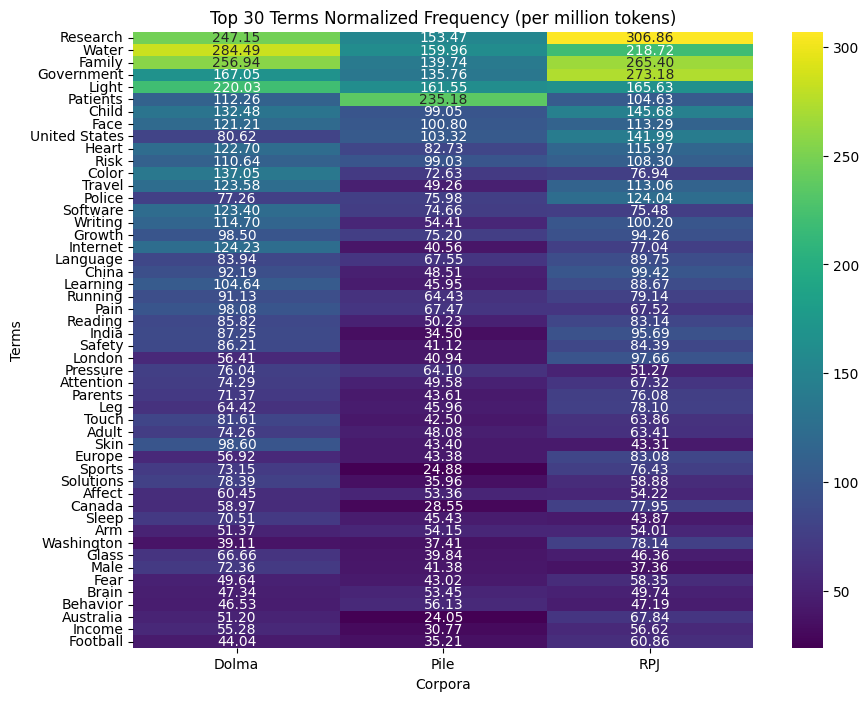

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Because the number of terms is large, let's focus on the top 30 terms by mean normalized count across all corpora
merged_df['Mean Count'] = merged_df[['Dolma', 'Pile', 'RPJ']].mean(axis=1)
top_terms = merged_df.sort_values('Mean Count', ascending=False).head(50)

# Prepare the data for heatmap
heatmap_data = top_terms.pivot("Term", "Mean Count", "Dolma")

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(top_terms[['Dolma', 'Pile', 'RPJ']], annot=True, fmt=".2f", cmap='viridis', yticklabels=top_terms['Term'])
plt.title('Top 30 Terms Normalized Frequency (per million tokens)')
plt.xlabel('Corpora')
plt.ylabel('Terms')
plt.show()
